# IT-Management (ITM III)

![]()

--- 

[Importieren eines Datensatzes](#Importieren-eines-Datensatzes)

1. [Deskriptive Datenanalyse](#Deskriptive-Datenanalys)  

2. [Explorative Datenanalyse](#Explorative-Datenanalyse)  

    2.1 [Datenvisualisierung](#Datenvisualisierung)  
    2.2 [Datenbereinigung](#Datenbereinigung)  
    2.2.1 [Imputing](#Imputation-mittels-Bibliotheken)  
    2.2.2 [Mapping](#Encoding-mittels-Bibliotheken)  
    2.2.3 [Binning](#Binning-mittels-Bibliotheken)  
    2.2.3 [Scaling](#Scaling-mittels-Bibliotheken)  

3. [Prädiktive Datenanalyse](#Prädiktive-Datenanalyse)
    
    3.1 [Feature Selection und Techniken zur Reduktion von Dimensionen](#feature-selection)
    
    3.1.1 [Korrelationsanalyse (R)](#Korrelationsanalyse-(R))    
    3.1.2 [Principal Component Analysis (PCA)](#Principle-Component-Analysis-(PCA))  
    3.1.3 [Linear Discriminant Analysis (LDA)](#Linear-Discriminant-Analysis-(LDA))  
    3.1.4 [Stochastic Neighbor Embedding (t-SNE)](#t-distributed-Stochastic-Neighbor-Embedding-(t-SNE))  
    
    3.2 [Machine Learning](#Machine-Learning)  
    3.3 [Deep Learning](#Deep-Learning)

[Exportieren eines Datensatzes](#Exportieren-eines-Datensatzes)

---

In [195]:
import math
import pandas as pd
import numpy as np

In [196]:
import warnings
warnings.filterwarnings("ignore")

## Importieren eines Datensatzes

* Trainingsdatensatz beinhaltet unabhängige Features (xi) und abhängige Labels (yi)
* Testdatensatz entspricht zukünftigen Daten und enthält daher keine Labels (yi)

In [197]:
df_test = pd.read_csv("Dataset-Google/googleplaystore.csv")
df_train = pd.read_csv("Dataset-Google/googleplaystore.csv")

## Deskriptive Datenanalyse

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [199]:
df_train.keys()

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [200]:
#df_train.head(5)

In [201]:
#df_train.tail(5)

In [202]:
df_train = df_train.dropna(subset=['Rating'])

In [203]:
df_train.sample(5, random_state=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1792,Helix Jump,GAME,4.2,1499373,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
4729,Ace Screen Recorder w facecam,TOOLS,4.2,2447,2.5M,"100,000+",Free,0,Everyone,Tools,"December 26, 2017",1.19,5.0 and up
8178,The Zueira's Voice,TOOLS,4.7,136540,3.1M,"1,000,000+",Free,0,Everyone,Tools,"July 10, 2018",4.75,4.0.3 and up
5378,DWWW 774 Ultimate AM Radio,NEWS_AND_MAGAZINES,4.7,327,31M,"10,000+",Free,0,Everyone,News & Magazines,"June 26, 2018",4.0.9,4.1 and up
3673,Free TV series,VIDEO_PLAYERS,3.7,400,7.2M,"100,000+",Free,0,Teen,Video Players & Editors,"May 28, 2018",v1.0.3,4.0.3 and up


In [204]:
df_train.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9367,9367,9367.000000,9367,9367,9367,9367,9367,9366,9367,9367,9363,9364
unique,8197,34,NaN,5993,415,20,3,74,6,116,1301,2639,31
top,ROBLOX,FAMILY,NaN,2,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1747,NaN,83,1637,1577,8719,8719,7420,733,319,1415,2059
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
#ratings_array = df_train['Rating'].values[:]
category_counts = df_train['Rating'].value_counts()
print(category_counts)

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64


In [206]:
## logische / boolsche Selektion
# df_train[df_train['Sex'] == 'male']

In [207]:
## zeilen- und spaltenweise Selektion
#print(df_train.iloc[0:5,0:12])

---
---

## Explorative Datenanalyse

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

sns.set()
sns.set_style("whitegrid")

### Datenvisualisierung

In [ ]:
# 1) Variablen entfernen
col_del = [
    'App', 'Reviews' , 'Current Ver', 'Android Ver'
]
df_train.drop(columns=col_del, inplace=True)

# 2) Liste der zu kodierenden Spalten
cat_cols = [
    'Category', 'Type', 'Content Rating', 'Genres',
    'Last Updated'
]

# 3) Label-Encoding mit pd.Categorical.cat.codes (0…n-1)
for col in cat_cols:
    df_train[col + '_code'] = df_train[col].astype('category').cat.codes

# 4) Ergebnis prüfen
print(df_train[[*cat_cols, *[c + '_code' for c in cat_cols]]].head())

   Category  Type  Content Rating  Genres  Last Updated  Category  Type  \
0         1     1               1       9           528         1     1   
1         1     1               1      11           451         1     1   
2         1     1               1       9           107         1     1   
3         1     1               4       9           779         1     1   
4         1     1               1      10           713         1     1   

   Content Rating  Genres  Last Updated  
0               1       9           528  
1               1      11           451  
2               1       9           107  
3               4       9           779  
4               1      10           713  


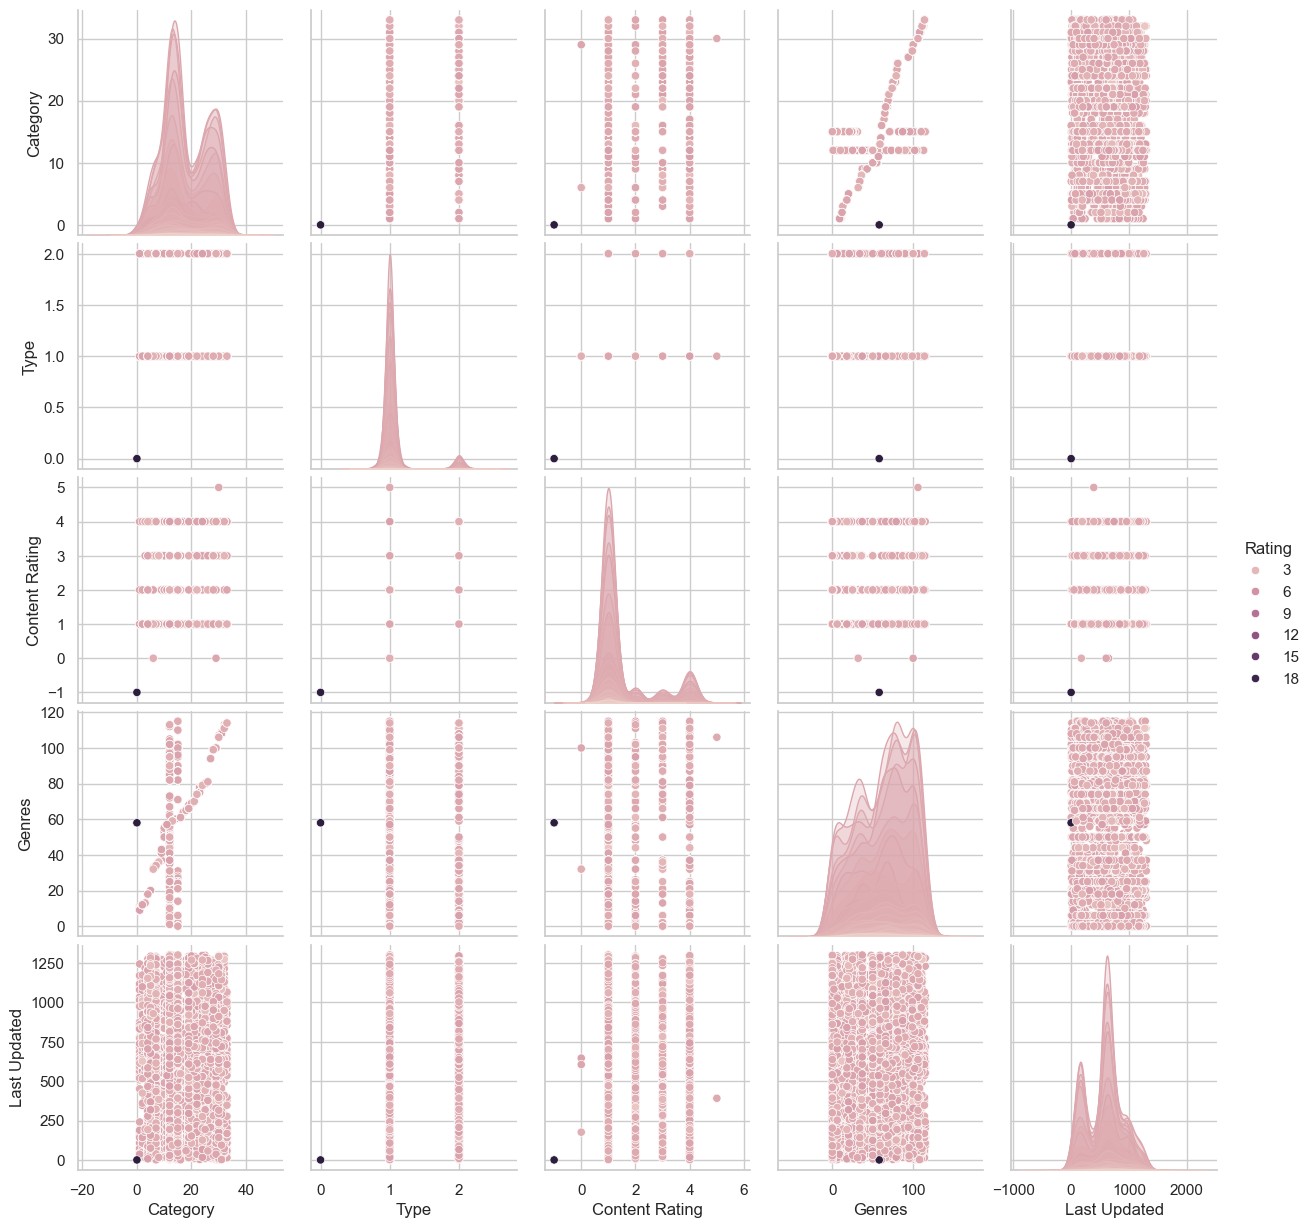

In [210]:
sns.pairplot(df_train, hue='Rating')
plt.show()

In [211]:
g = sns.lmplot(x='Age',y='Fare',data=df_train,hue='Survived',col='Pclass')

KeyError: "None of [Index(['Age', 'Fare', 'Pclass', 'Survived'], dtype='object')] are in the [columns]"

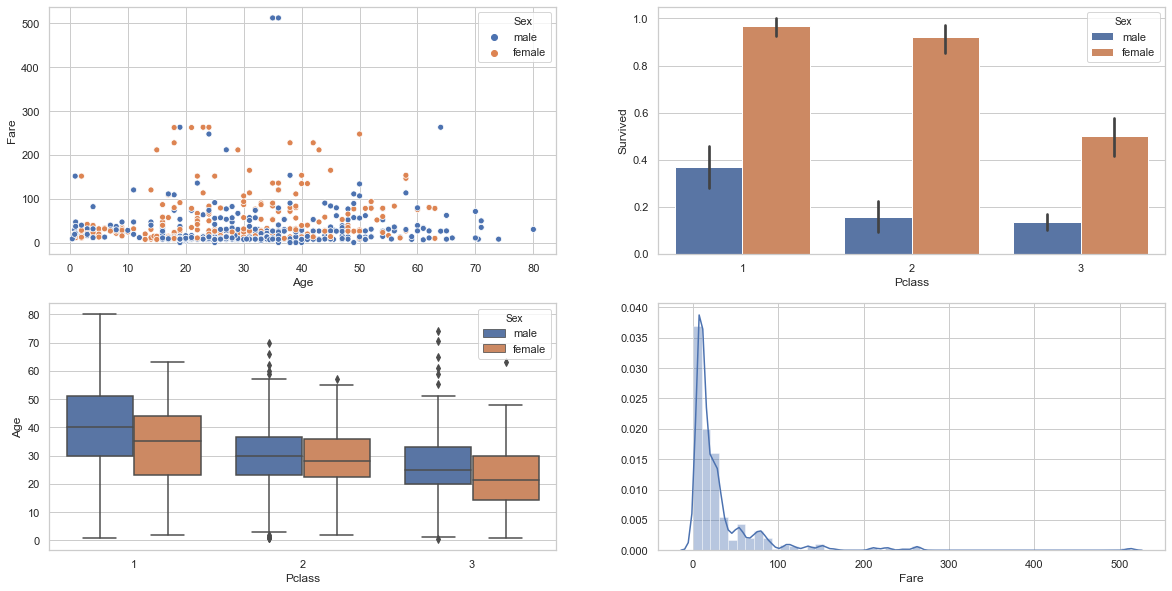

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,10), squeeze=False)

sns.scatterplot(x='Age',y='Fare',data=df_train,hue='Sex',ax=axes[0][0])

sns.barplot(x='Pclass',y='Survived',data=df_train,hue='Sex',ax=axes[0][1])

sns.boxplot(x='Pclass',y='Age',data=df_train,hue='Sex',ax=axes[1][0])

sns.distplot(df_train['Fare'],ax=axes[1][1])

plt.show()

### Datenbereinigung

- Step 1.) Imputation d.h. fehlende Werte ersetzen
- Step 2.) Kodierung d.h., kategorische Werte umwandeln
- Step 3.) Binning d.h., numerische Werte in Buckets umwandeln
- Step 4.) Skalierung d.h., numerische Werte standardisieren

#### Imputation

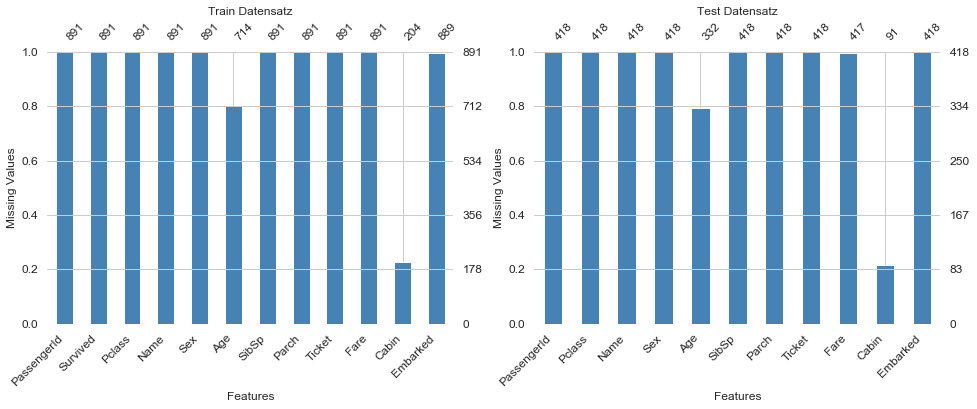

In [ ]:
## pip install missingno

import missingno as msno

fig, (ax00, ax01) = plt.subplots(nrows=1,ncols=2, figsize=(16,5))

ax00.set_title("Train Datensatz")
ax00.set_xlabel("Features")
ax00.set_ylabel("Missing Values")

msno.bar(df_train,figsize=(20,6),fontsize=12,color='steelblue', ax=ax00)

ax01.set_title("Test Datensatz")
ax01.set_xlabel("Features")
ax01.set_ylabel("Missing Values")

msno.bar(df_test,figsize=(20,6),fontsize=12,color='steelblue', ax=ax01)

plt.show()

In [ ]:
# Funktionsdefinition
# TODO: Panel statt DataFrame
# pd.MultiIndex.from_frame().to_frame()

def null_table(df):

    result_df = pd.DataFrame(
        {
            'absolute': [],
            'relative': []
        }
    )

    result_df['absolute'] = pd.isnull(df).sum()
    result_df['relative'] = pd.isnull(df).sum() / len(df)
    
    return result_df

In [ ]:
null_table(df_train)

,absolute,relative
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
# null_table(df_test)

In [ ]:
## Spalten mit mehr 20% an fehlenden Daten löschen (hier: Cabin)
## Spalten mit künstlich generierten Werten löschen (hier: Ticket)

df_train.drop(columns=["Cabin", "Ticket"], inplace=True)
df_test.drop(columns=["Cabin", "Ticket"], inplace=True)

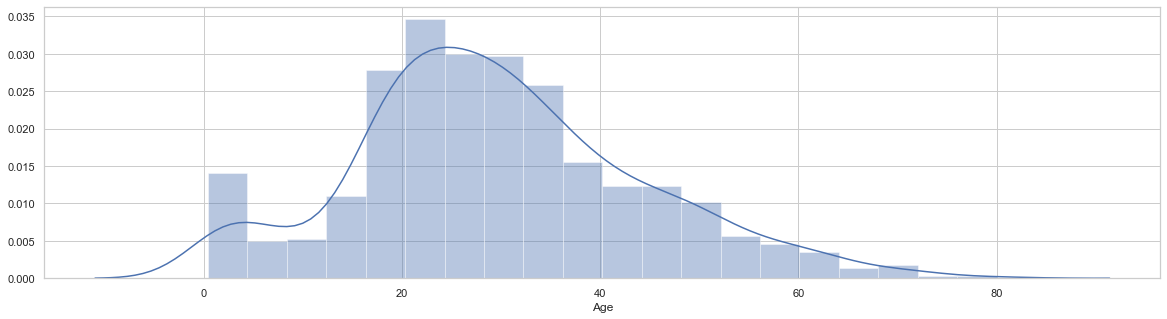

In [ ]:
## Imputation auf Spalten mit weniger als 20% fehlenden Daten
## Imputation basiert auf der Verteilung, d.h. mean() oder median()

tmp = df_train.copy()
tmp.dropna(inplace = True)

fig = plt.figure(figsize=(20,5))

sns.distplot(tmp["Age"])

plt.show()

In [ ]:
## categorial value -> mode()
## numeric value, normal distributaion -> mean()
## numeric value, skewed distributaion -> median()

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

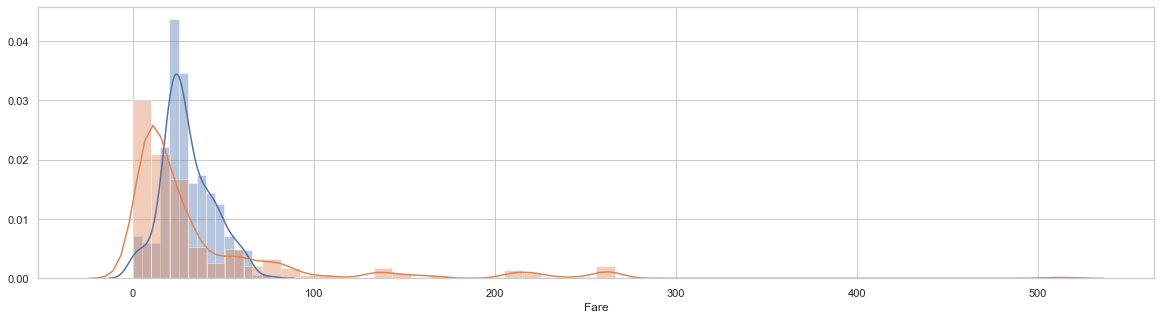

In [ ]:
tmp = df_test.copy()
tmp.dropna(inplace = True)

fig = plt.figure(figsize=(20,5))

sns.distplot(tmp["Age"])
sns.distplot(tmp["Fare"])

plt.show()

In [ ]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [ ]:
## zeilenweises Löschen von Daten mittels .index
# df.drop(df[df['COLUMN'].isnull()].index, axis=0, inplace=True)

### Datenbereinigung

#### Imputation mittels Bibliotheken

In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='median')
df_train['Age'] = si.fit_transform(df_train['Age'].values.reshape(-1, 1))
df_test['Age'] = si.fit_transform(df_test['Age'].values.reshape(-1, 1))
df_test['Fare'] = si.fit_transform(df_test['Fare'].values.reshape(-1, 1))

si = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # mode()
df_train['Embarked'] = si.fit_transform(df_train['Embarked'].values.reshape(-1, 1))

In [ ]:
df_train.sample(5, random_state=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,28.0,0,0,14.4583,C
648,649,0,3,"Willey, Mr. Edward",male,28.0,0,0,7.5500,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,29.1250,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,146.5208,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,15.2458,C


In [ ]:
# file = df_train.copy()
# file.to_csv('cleaned_dataset.csv', index=False)

### Datentransformation

#### Mapping mittels Bibliotheken

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

le = LabelEncoder() # für nominale Daten
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])


lb = LabelBinarizer() # für ordinale Daten

df_train['Embarked_0'] = lb.fit_transform(df_train['Embarked']).reshape(df_train.shape[0],-1).T[0]
df_train['Embarked_1'] = lb.fit_transform(df_train['Embarked']).reshape(df_train.shape[0],-1).T[1]
df_train['Embarked_2'] = lb.fit_transform(df_train['Embarked']).reshape(df_train.shape[0],-1).T[2]
df_test['Embarked_0'] = lb.fit_transform(df_test['Embarked']).reshape(df_test.shape[0],-1).T[0]
df_test['Embarked_1'] = lb.fit_transform(df_test['Embarked']).reshape(df_test.shape[0],-1).T[1]
df_test['Embarked_2'] = lb.fit_transform(df_test['Embarked']).reshape(df_test.shape[0],-1).T[2]

#### Binning mittels Bibliotheken

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

bd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

df_train['Age'] = bd.fit_transform(df_train['Age'].values.reshape(-1, 1))
df_test['Age'] = bd.fit_transform(df_test['Age'].values.reshape(-1, 1))

#### Scaling mittels Bibliotheken

In [ ]:
## Normalisierung von Daten ist keine strikte Voraussetzung
## Standardisierung für Daten mit vielen Outliners oder für PCA

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

ns = MinMaxScaler()
ss = StandardScaler()

df_train['Fare'] = ss.fit_transform(df_train['Fare'].values.reshape(-1, 1))
df_test['Fare'] = ss.fit_transform(df_test['Fare'].values.reshape(-1, 1))

---
---

## Prädiktive Datenanalyse

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

### Feature Engineering

In [ ]:
df_train['FamSize'] = df_train["SibSp"] + df_train["Parch"] + 1
df_test['FamSize'] = df_test["SibSp"] + df_test["Parch"] + 1

df_train["IsAlone"] = df_train.FamSize.apply(lambda x: 1 if x == 1 else 0)
df_test["IsAlone"] = df_test.FamSize.apply(lambda x: 1 if x == 1 else 0)

### Feature Selection

In [ ]:
## Datensatz nach xi und y aufteilen

Y = df_train['Survived']
X = df_train[['Pclass','Sex','Age', 'SibSp','Parch', 'Fare','Embarked_0','Embarked_1','Embarked_2','FamSize', 'IsAlone']]
T = df_test[['Pclass','Sex','Age', 'SibSp','Parch', 'Fare','Embarked_0','Embarked_1','Embarked_2','FamSize', 'IsAlone']]

#### Feature Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mmn = MinMaxScaler()
mmn_train_X = mmn.fit_transform(X)

std = StandardScaler()
std_train_X = std.fit_transform(X)

In [ ]:
# df_mmn = pd.DataFrame(mmn_train_X)
# df_mmn['Y'] = Y

# df_std = pd.DataFrame(std_train_X)
# df_std['Y'] = Y

#### Korrelationsanalyse (R)

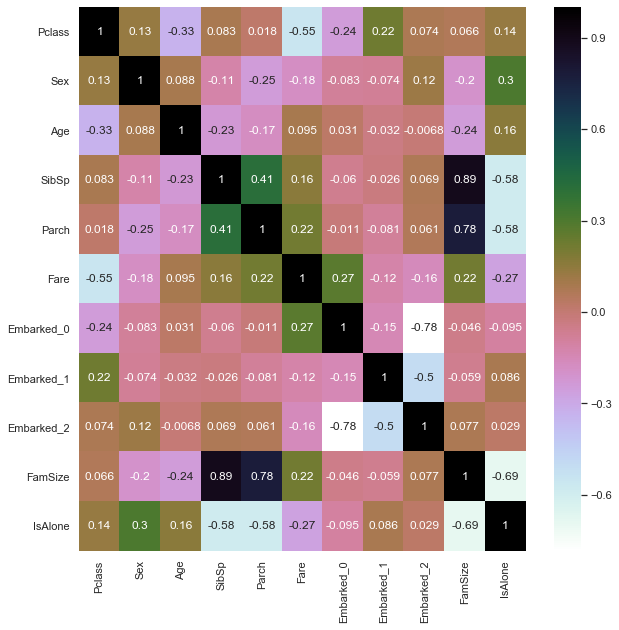

In [ ]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(X.corr(), annot=True, cmap='cubehelix_r',cbar_kws={"orientation": "vertical"})

plt.show()

#### Principle Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca_X = pca.fit_transform(std_train_X)

In [ ]:
# np.cumsum(pca.explained_variance_ratio_)

In [ ]:
df_pca = pd.DataFrame(pca_X)
df_pca['Y'] = Y

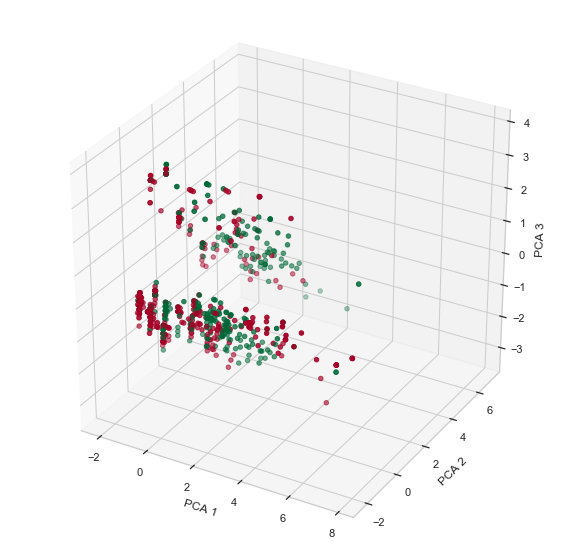

In [ ]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')

ax.scatter(
    xs=df_pca[0],
    ys=df_pca[1],
    zs=df_pca[2],
    c=df_pca['Y'],
    cmap='RdYlGn')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

#### Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
lda_X = lda.fit_transform(std_train_X, Y)

In [ ]:
df_lda = pd.DataFrame(lda_X)
df_lda['Y'] = Y

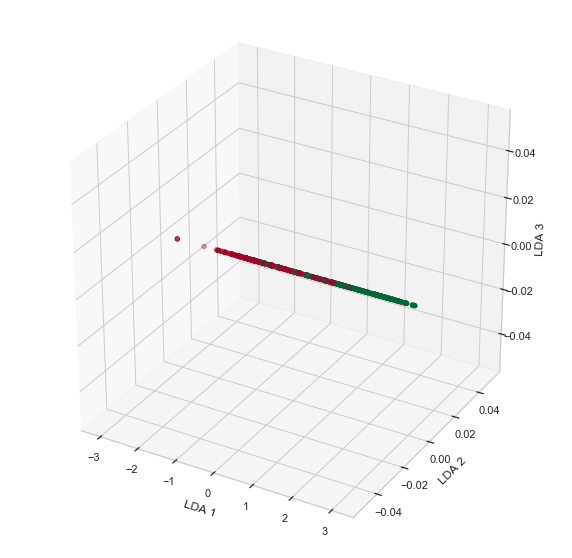

In [ ]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')

ax.scatter(
    xs=df_lda[0],
    ys=np.zeros_like(df_lda.shape[0]),
    zs=np.zeros_like(df_lda.shape[0]),
    c=df_lda['Y'],
    cmap='RdYlGn')

ax.set_xlabel('LDA 1')
ax.set_ylabel('LDA 2')
ax.set_zlabel('LDA 3')

plt.show()

#### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE

sne = TSNE(n_components=3)
sne_X = sne.fit_transform(std_train_X)

In [ ]:
df_sne = pd.DataFrame(sne_X)
df_sne['Y'] = Y

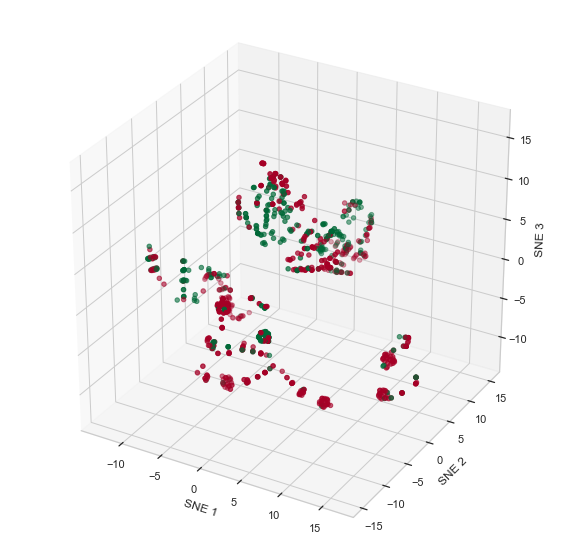

In [ ]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')

ax.scatter(
    xs=df_sne[0],
    ys=df_sne[1],
    zs=df_sne[2],
    c=df_sne['Y'],
    cmap='RdYlGn')

ax.set_xlabel('SNE 1')
ax.set_ylabel('SNE 2')
ax.set_zlabel('SNE 3')

plt.show()

### Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Splitten des Trainingsdatensatz mit bekanntem y

train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)



## skalierter Datensatz
#mnn_train_X, mnn_valid_X, mnn_train_Y, mnn_valid_Y = train_test_split(mmn_train_X, Y, test_size=0.2, random_state=0, stratify=Y)
#std_train_X, std_valid_X, std_train_Y, std_valid_Y = train_test_split(std_train_X, Y, test_size=0.2, random_state=0, stratify=Y)

## reduzierter Datensatz
#pca_train_X, pca_valid_X, pca_train_Y, pca_valid_Y = train_test_split(df_pca.iloc[:,0:8], df_pca['Y'], test_size=0.2, random_state=0, stratify=Y)
#lda_train_X, lda_valid_X, lda_train_Y, lda_valid_Y = train_test_split(df_lda.iloc[:,0:1], df_lda['Y'], test_size=0.2, random_state=0, stratify=Y)
#sne_train_X, sne_valid_X, sne_train_Y, sne_valid_Y = train_test_split(df_sne.iloc[:,0:3], df_sne['Y'], test_size=0.2, random_state=0, stratify=Y)

### Model Selection

In [ ]:
# Classification

from sklearn.linear_model import LogisticRegression as LRC
from sklearn.linear_model import RidgeClassifier as RRC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.naive_bayes import GaussianNB as GNB

## pip install xgboost
## from xgboost import XGBClassifier as XGB

In [ ]:
#reg_prediction = dict()
#reg_pipelines = dict()

clf_prediction = dict()
clf_pipelines = dict({
    
    'LRC': Pipeline(steps=[('STD',std),('PCA',pca),('LRC', LRC())], verbose=0),
    'KNC': Pipeline(steps=[('STD',std),('PCA',pca),('KNC', KNC())], verbose=0),
    #'SVC': Pipeline(steps=[('STD',std),('PCA',pca),('SVC', SVC())], verbose=0),
    'DTC': Pipeline(steps=[('STD',std),('PCA',pca),('DTC', DTC())], verbose=0),
    'RFC': Pipeline(steps=[('STD',std),('PCA',pca),('RFC', RFC())], verbose=0),
    'ABC': Pipeline(steps=[('STD',std),('PCA',pca),('ABC', ABC())], verbose=0),
    'GBC': Pipeline(steps=[('STD',std),('PCA',pca),('GBC', GBC())], verbose=0),
    'GNB': Pipeline(steps=[('STD',std),('PCA',pca),('GNB', GNB())], verbose=0),
})

for name, model in clf_pipelines.items():
    
    model.fit(train_X, train_Y)
    model.score(valid_X, valid_Y)
    
    clf_prediction[name] = model.predict(T)

### Model Validation

* Confusion Matrix, Accuracy, Precison und Recall
* jeweils berechnet mittels Cross Validation (CV)

In [ ]:
## Metriken

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [ ]:
## Validierung

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score #validiert die Modelle anhand ihrer 'accuracy'
from sklearn.model_selection import cross_validate  #zusätzlicher Parameter 'scoring' (siehe sklearn.metrics)

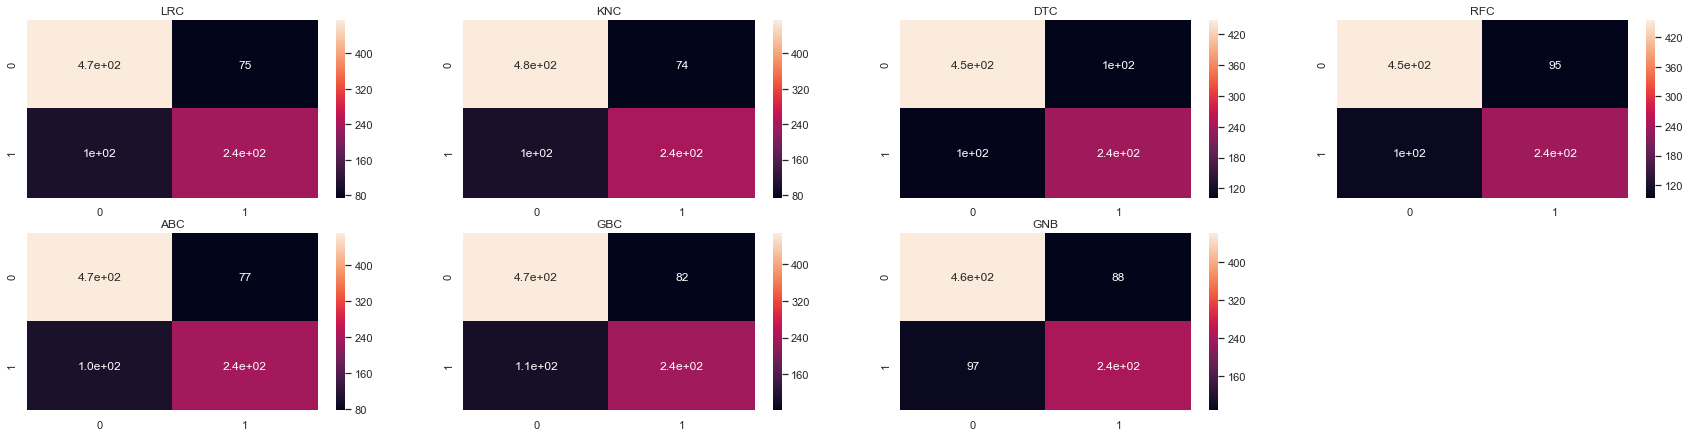

In [ ]:
fig = plt.figure(figsize=(30,15))

for (name, model), axes in zip(clf_pipelines.items(), range(1,len(clf_pipelines.items())+1)):
    
    ax = fig.add_subplot(4,4,axes)
    
    ax.set_title(name)
    ax.set_xlabel('pred value')
    ax.set_ylabel('true value')
    
    sns.heatmap(confusion_matrix(Y, cross_val_predict(model, X, Y, cv=10)), annot=True)
    
plt.show()

In [ ]:
## Regression: cv=KFold(n_splits=n)
## Klassifikation: cv=StratifiedKFold(n_splits=n)

dict_validation = dict()

for (name, model) in clf_pipelines.items():
    
    dict_validation[name] = cross_validate(estimator=model, X=X, y=Y, cv=10, scoring=('accuracy', 'precision', 'recall'), n_jobs=-1)


In [ ]:
def show_metrics(df):
    
    tab = pd.DataFrame({}, columns=['Accuracy', 'Precesion', 'Recall'],
                           index={index:[label] for index, label in df.items()})

    for model, values in df.items():
        
        tab['Accuracy'][model] = values['test_accuracy'].mean()
        tab['Precesion'][model] = values['test_precision'].mean()
        tab['Recall'][model] = values['test_recall'].mean()
        
    tab
    
    return tab

In [ ]:
def plot_metrics(df, mode='accuracy'):
    
    fig = plt.figure(figsize=(10,5))
    
    plt.title('')
    plt.ylabel('')
    plt.xlabel('')
    
    for model, values in df.items():
        
        if mode == 'accuracy':
            plt.plot(df[model]['test_accuracy'])
            plt.xticks([k for k in range(len(df[model]['test_accuracy']))])
        elif mode == 'precision':
            plt.plot(df[model]['test_precision'])
            plt.xticks([k for k in range(len(df[model]['test_precision']))])
        elif mode == 'recall':
            plt.plot(df[model]['test_recall'])
            plt.xticks([k for k in range(len(df[model]['test_recall']))])

    plt.legend({model:[label] for model, label in df.items()}, loc='upper left')

In [ ]:
show_metrics(dict_validation)

,Accuracy,Precesion,Recall
LRC,0.799171,0.765692,0.695882
KNC,0.802442,0.766788,0.70479
DTC,0.763266,0.699981,0.684454
RFC,0.778985,0.723845,0.690252
ABC,0.795738,0.757284,0.693109
GBC,0.790119,0.747607,0.687059
GNB,0.792442,0.738887,0.716303


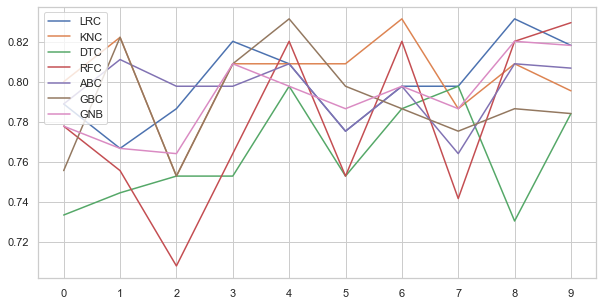

In [ ]:
plot_metrics(dict_validation)

#### Area under the ROC Curve

In [ ]:
def plot_roc_auc(roc_, auc_):
    
    plt.figure(figsize=(12,5))

    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    
    for model in roc_:
        
        plt.plot(roc_[model][0], roc_[model][1],
                 label='ROC for {} with AUC of {}'.format(model, auc_[model].round(2)))
    
    
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
dict_roc = dict()
dict_auc = dict()

for (name, model) in clf_pipelines.items():

    dict_roc[name] = roc_curve(train_Y, model.predict_proba(train_X)[:,1])[0:2]
    dict_auc[name] = auc(dict_roc[name][0], dict_roc[name][1])


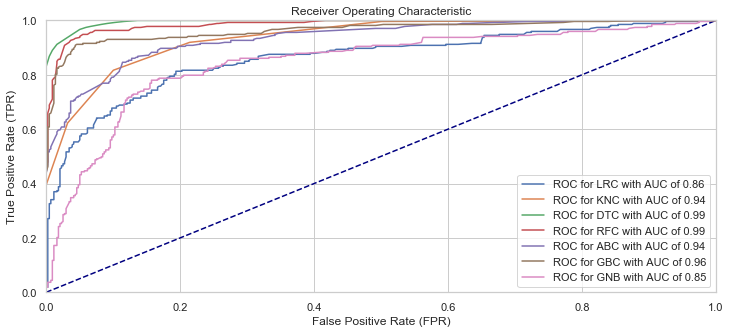

In [ ]:
plot_roc_auc(dict_roc, dict_auc)

### Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
## kartesisches Produkt
## estimator.get_params().keys()

dict_optimization = dict()

parameters = {
    'params_pilepline_1': [
        {'PCA__n_components':[4,6,8]},
        {'LRC__penalty' : ['l1', 'l2']},
        {'LRC__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
        {'LRC__max_iter' : range(100, 1000)}
    ],
    'params_knc': [{'KNC__n_neighbors' : range(1, 100)}, {'KNC__metric' : ['minkowski']}, {'KNC__p' : [2]}],
    #'params_svc': [{'SVC__kernel':['linear','poly','rbf']}],
    'params_dtc': [{'DTC__criterion' : ['gini', 'entropy']}, {'DTC__splitter' : ['random', 'best']}],
    'params_rfc': [{'RFC__n_estimators' : range(1, 100)}, {'RFC__criterion':['entropy', 'gini']}],
    'params_abc': [{'ABC__learning_rate': [0.25, 0.50, 0.75, 1.0]}],
    'params_gbc': [{'GBC__learning_rate': [0.25, 0.50, 0.75, 1.0]}],
    'params_gnb': [{'GNB__var_smoothing': [1e-09]}],
}

for (name, model), (elem, param) in zip(clf_pipelines.items(), parameters.items()):
    
    dict_optimization[name]=(GridSearchCV(estimator=model, param_grid=param, scoring='accuracy', cv=10, n_jobs=-1)).fit(X, Y)

In [ ]:
for name, model in dict_optimization.items():
    print('{}: '.format(name) + str(model.best_score_))
    print('{}: '.format(name) + str(model.best_params_))
    print(model.best_estimator_)
    print('')

LRC: 0.7991021324354658
LRC: {'PCA__n_components': 8}
Pipeline(memory=None,
         steps=[('STD',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('LRC',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=0)

KNC: 0.813692480359147
KNC: {'KNC__n_neighbors': 6}
Pipeline(memory=None,
         steps=[('ST

### Model Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier as VC

In [ ]:
ens = VC(estimators=[(name, model.best_estimator_) for name, model in dict_optimization.items()], voting='hard')

ens.fit(train_X, train_Y)
ens.score(valid_X, valid_Y)

ens_prediction = ens.predict(T)

In [ ]:
ens_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Exportieren eines Datensatzes

In [ ]:
file = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': ens_prediction
    
    #usw.
})

file.to_csv('prediction.csv', index=False)

# Deep Learning

* **Artificial Neural Network (ANN)**
* Convolutional Neural Network (CNN)
* Recurrent Neural Network (RNN)

In [ ]:
## pip install keras
## pip install tensorflow
## pip install graphviz

from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Activation

from keras.optimizers import *
from keras.regularizers import *

from keras.utils.vis_utils import plot_model

from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [ ]:
## Model Architecture
## Artifical Neural Network

def ANN(layers=[64], act='relu', opt='Adam', dr=0.5, lr=0.001):
    
    model = Sequential() #sonst: Model()
    
    ## INPUT Layer
    ## eindimensionale features:  input_dim()
    ## mehrdimensionale features: input_shape()

    model.add(Dense(units=64, activation=act, input_dim=(11)))

    ## HIDDEN Layer (optional)

    for i in range(1,len(layers)): 
    
        model.add(Dense(layers[i], activation=act))
        model.add(Dropout(rate=dr))

    ## OUTPUT Layer
    model.add(Dense(units=1, activation='sigmoid'))

    # compiling
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

## Test: model.add(Dense(units=16,kernel_initializer='glorot_uniform', activation='relu'))

In [ ]:
ann = ANN(layers=[64,100,64,21])

In [ ]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 21)                1365      
_________________________________________________________________
dropout_6 (Dropout)          (None, 21)               

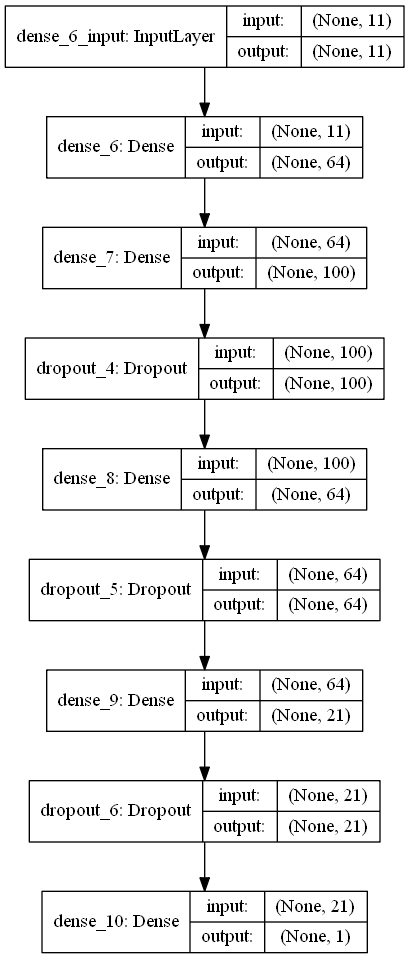

In [ ]:
plot_model(ann, show_shapes=True, show_layer_names=True)

In [ ]:
history = ann.fit(train_X, train_Y, batch_size=25, epochs=50, verbose=0, validation_data=(valid_X, valid_Y))

In [ ]:
loss_acc_train = ann.evaluate(train_X, train_Y, batch_size=25, verbose=0) #[0] loss, [1] accuracy
loss_acc_valid = ann.evaluate(valid_X, valid_Y, batch_size=25, verbose=0) #[0] loss, [1] accuracy

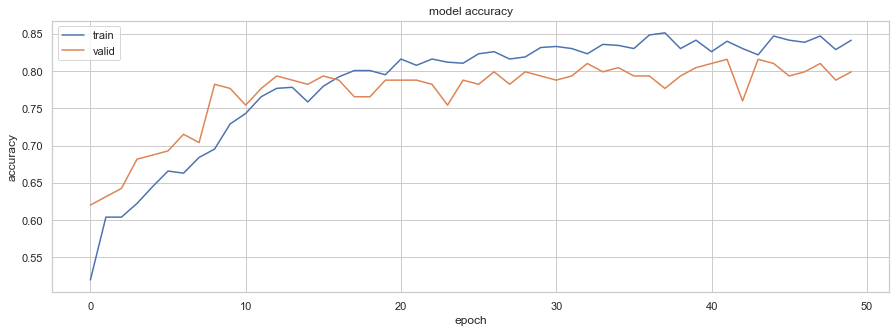

Mean Accuracy for training set :0.8525280913944995
Mean Accuracy for validation set:0.7988826818972327


In [ ]:
fig = plt.figure(figsize=(15,5))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

print('Mean Accuracy for training set :' + str(loss_acc_train[1]))
print('Mean Accuracy for validation set:' + str(loss_acc_valid[1]))

### Model Validation

In [ ]:
cv_ann = cross_validate(estimator=KerasClassifier(build_fn=ANN, batch_size=25, epochs=25), X=train_X, y=train_Y, cv=10, scoring=['accuracy','precision','recall'], n_jobs=-1)
cv_ann['test_accuracy'].mean()

0.811737089201878

### Model Optimization

In [ ]:
ann_grid = GridSearchCV(estimator=KerasClassifier(build_fn=ANN),
                        param_grid={'batch_size':[25,50,75,100],'epochs': [25,50,75,100]}, 
                        scoring='accuracy', cv=5, n_jobs=1)


grid_result = ann_grid.fit(train_X, train_Y, verbose=0, validation_data=(valid_X, valid_Y))

print('The parameters of the best model are: ')
print(grid_result.best_params_)


The parameters of the best model are: 
{'batch_size': 50, 'epochs': 75}


In [ ]:
ann_grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000214BD8988D0>,
             iid='warn', n_jobs=1,
             param_grid={'batch_size': [25, 50, 75, 100],
                         'epochs': [25, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.821629 using {'batch_size': 50, 'epochs': 75}
0.806180 (0.034462) with: {'batch_size': 25, 'epochs': 25}
0.816011 (0.038463) with: {'batch_size': 25, 'epochs': 50}
0.813202 (0.033912) with: {'batch_size': 25, 'epochs': 75}
0.811798 (0.029721) with: {'batch_size': 25, 'epochs': 100}
0.796348 (0.026604) with: {'batch_size': 50, 'epochs': 25}
0.816011 (0.044025) with: {'batch_size': 50, 'epochs': 50}
0.821629 (0.035497) with: {'batch_size': 50, 'epochs': 75}
0.813202 (0.033248) with: {'batch_size': 50, 'epochs': 100}
0.783708 (0.031742) with: {'batch_size': 75, 'epochs': 25}
0.808989 (0.035409) with: {'batch_size': 75, 'epochs': 50}
0.808989 (0.033723) with: {'batch_size': 75, 'epochs': 75}
0.816011 (0.028864) with: {'batch_size': 75, 'epochs': 100}
0.740169 (0.052154) with: {'batch_size': 100, 'epochs': 25}
0.799157 (0.037590) with: {'batch_size': 100, 'epochs': 50}
0.808989 (0.032337) with: {'batch_size': 100, 'epochs': 75}
0.813202 (0.024766) with: {'batch_size': 100, 'epochs':

In [ ]:
new_ann = ANN(layers=[64,64,32,32])
new_ann.fit(train_X, train_Y, batch_size=25, epochs=50, verbose=0, validation_data=(valid_X, valid_Y))

In [ ]:
ann_result = new_ann.predict(T, batch_size=25, verbose=0)

In [ ]:
ann_result.round()

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],